---

### 1. problem definition

Predict the Global_Sale
1. Analyse the importance of features that can be of help in increasing the global sales

---

### 2. Dataset preview

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [33]:
video_game = pd.read_csv('Video_Games.csv')
video_game.info()
video_game.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


The video game dataset shows the platform, genre, user score and critic score

---

### 3. Data Cleaning / Preparation

Convert User_Score from object to numeric data

In [34]:
def change_obj_cols(se):
    value = se.unique().tolist()
    return se.map(pd.Series(range(len(value)), index = value)).values

for col in ['User_Score']:
    video_game[col] = change_obj_cols(video_game[col])

In [35]:
video_game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,1,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,2,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,1,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,1,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,1,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,1,NaN,NaN,NaN


Drop the rows where critic score are null

In [36]:
video_game = pd.DataFrame(video_game[video_game['Critic_Score'].isnull()==False])
video_game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,2,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,3,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,4,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,52,43.0,Atomic Games,T
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,35,NaN,Taito Corporation,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,10.0,35,NaN,Interchannel-Holon,E
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,25,13.0,SimBin,E10+


---

### 4. Data Analysis / Visualisation

1. Check the number of unique levels for categorical data

In [37]:
print("Number of unique classes in Platform :", len(video_game["Platform"].unique()))
print("Number of unique classes in Genre :", len(video_game["Genre"].unique()))
print("Number of unique classes in Publisher :", len(video_game["Publisher"].unique()))

Number of unique classes in Platform : 17
Number of unique classes in Genre : 12
Number of unique classes in Publisher : 304


2. Visualisation for platform

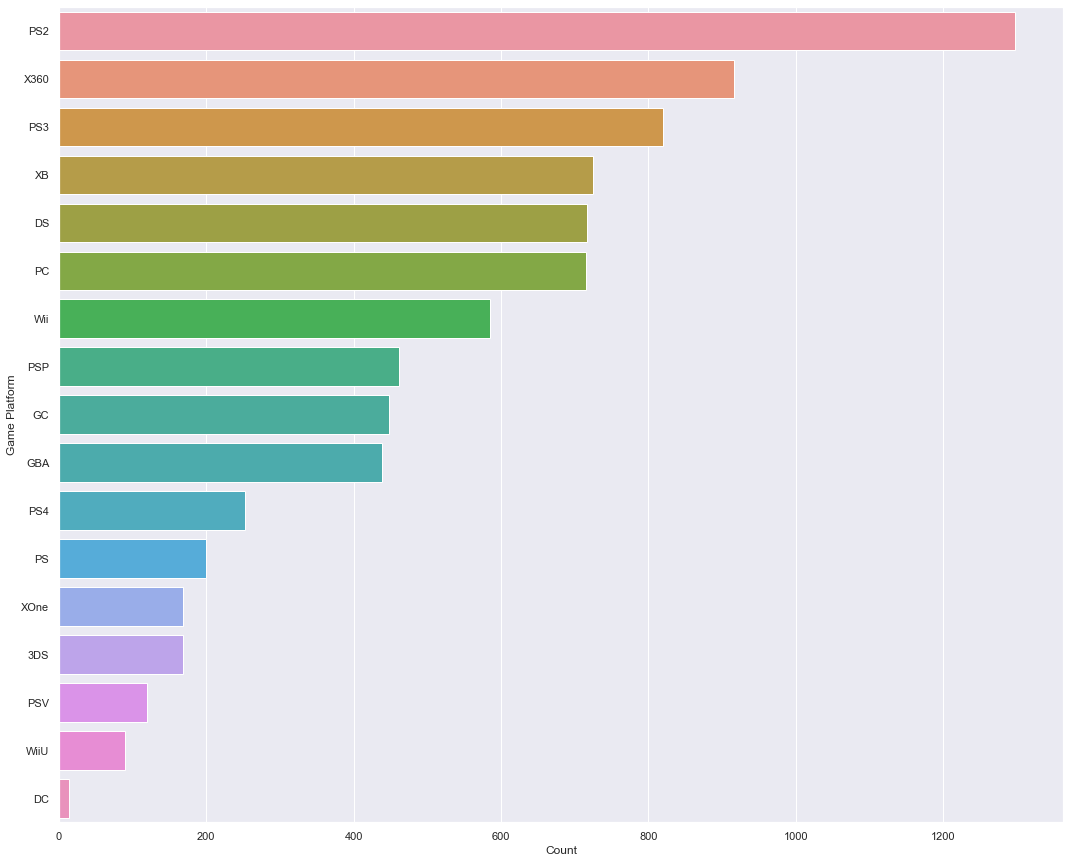

In [38]:
platform_count = pd.DataFrame()
platform_count = video_game.loc[:,'Platform'].value_counts()
platform_count = platform_count.to_frame()
platform_count['Game Platform'] = platform_count.index
platform_count = platform_count.rename(columns = {'Platform' : 'Count'})

plt.figure(figsize=(18, 15))
sns.set(font_scale = 1)
sns.barplot(data = platform_count, x = 'Count', y = 'Game Platform')
plt.show()

In the countplot, the PS2 is the most commonly used game platform, followed by X360 and PS3
Below, we plot the boxplot of Global_Sale for each platform

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

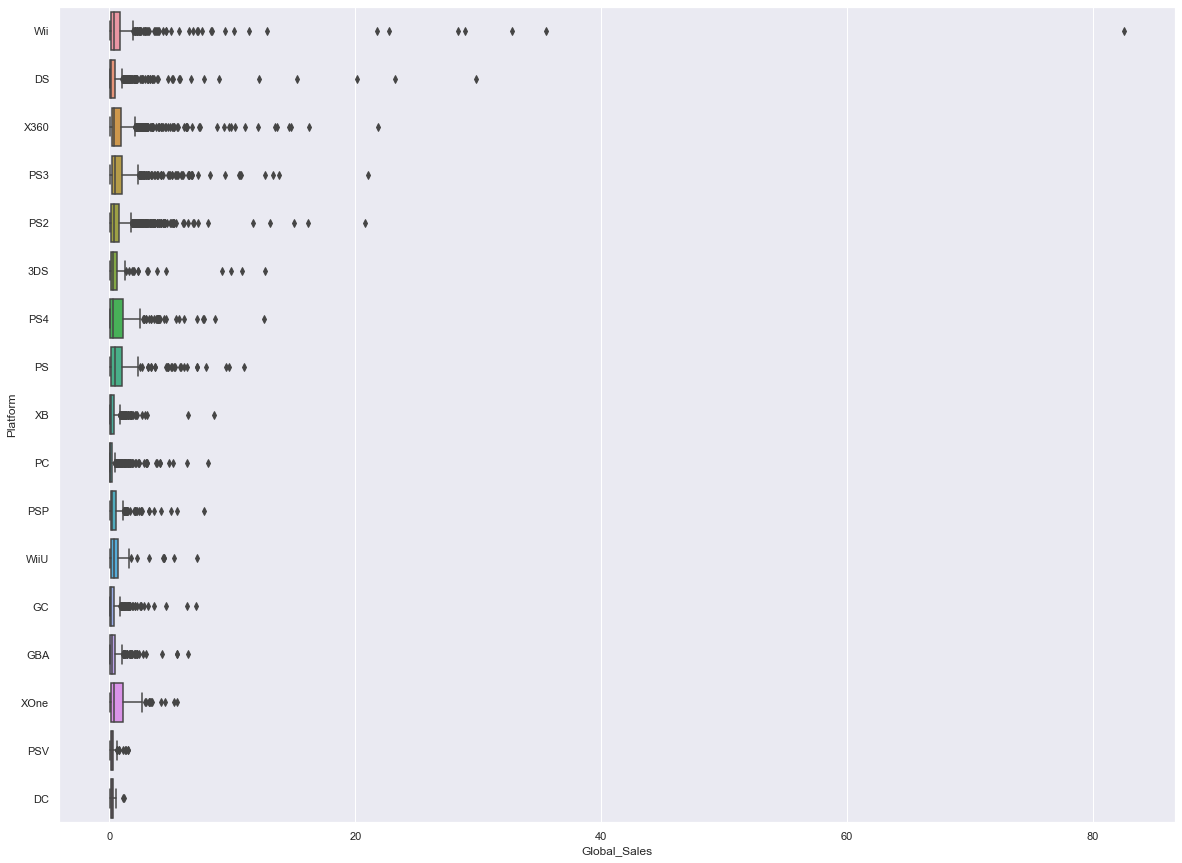

In [39]:
f, axes = plt.subplots(figsize=(20, 15))
sns.boxplot(x = 'Global_Sales', y = 'Platform', data = video_game)

3. Visualisation for genre

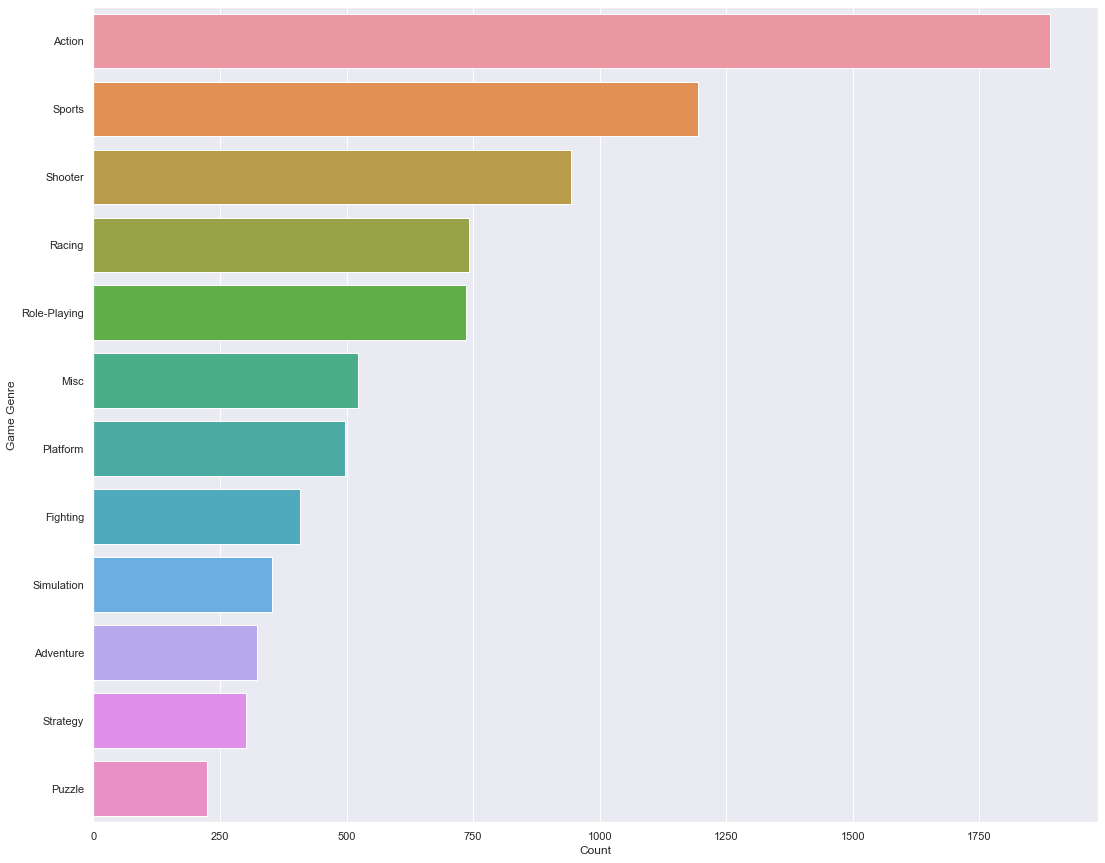

In [40]:
genre_count = pd.DataFrame()
genre_count = video_game.loc[:,'Genre'].value_counts()
genre_count = genre_count.to_frame()
genre_count['Game Genre'] = genre_count.index
genre_count = genre_count.rename(columns = {'Genre' : 'Count'})

plt.figure(figsize=(18, 15))
sns.set(font_scale = 1)
sns.barplot(data = genre_count, x = 'Count', y = 'Game Genre')
plt.show()

From the countplot, Action Game is the most popular genre in video games, followed by sports and shooter
Below is the boxplot of Global_Sale for each genre

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

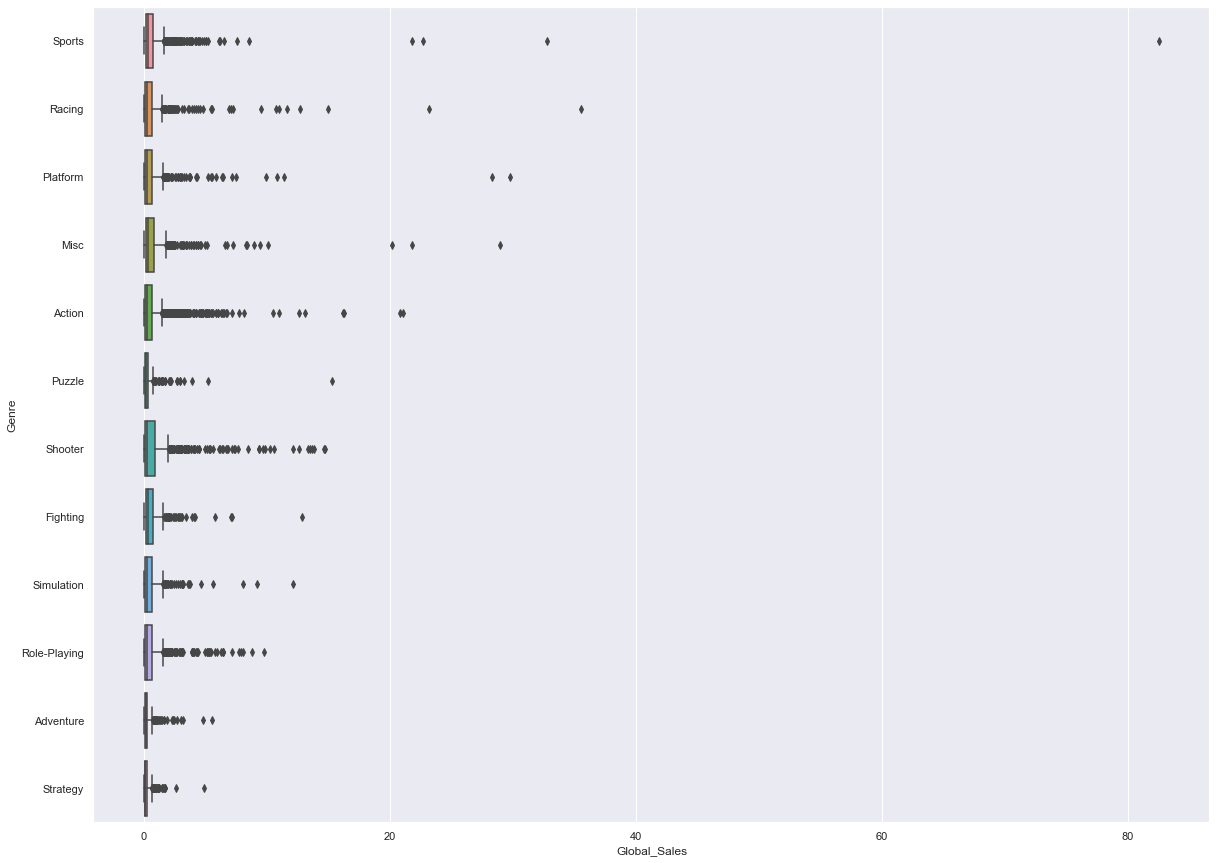

In [41]:
f, axes = plt.subplots(figsize=(20, 15))
sns.boxplot(x = 'Global_Sales', y = 'Genre', data = video_game)

4. Visualisation for publisher

In [42]:
publisher = pd.DataFrame(video_game["Publisher"].value_counts())
publisher.describe()

,Publisher
count,303.000000
mean,26.841584
std,92.146342
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,1029.000000


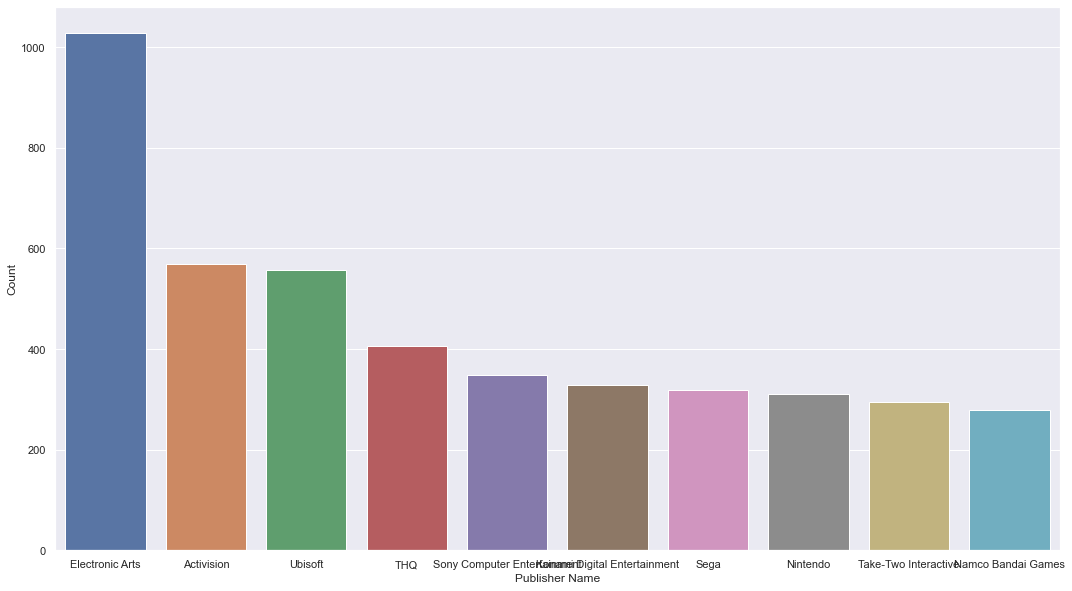

In [43]:
publisher_count = pd.DataFrame()
publisher_count = video_game.loc[:,'Publisher'].value_counts()
publisher_count = publisher_count.to_frame()
publisher_count['Publisher Name'] = publisher_count.index
publisher_count = publisher_count.iloc[0:10 , :]
publisher_count = publisher_count.rename(columns = {'Publisher' : 'Count'})

plt.figure(figsize=(18, 10))
sns.set(font_scale = 1)
sns.barplot(data = publisher_count, x = 'Publisher Name', y = 'Count')
plt.show()

Here, we show the largest 10 publisher that produce the most video games

5. Visualisation for global sales

<AxesSubplot:>

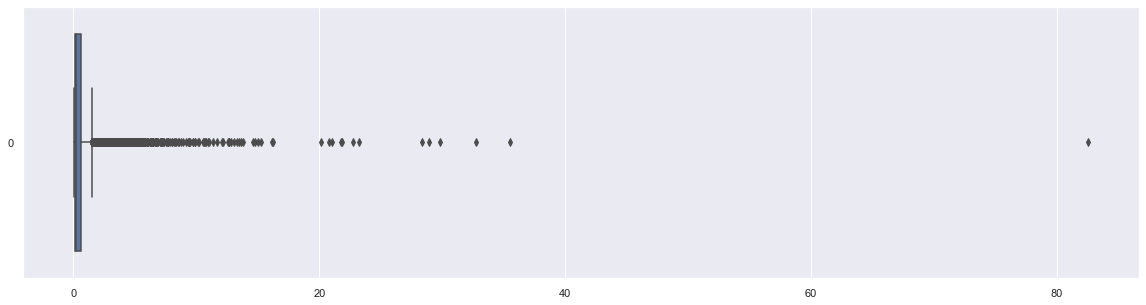

In [44]:
f, axes = plt.subplots(figsize=(20, 5))
sns.boxplot(data = video_game["Global_Sales"], orient = "h")

6. Visualisation for user score

<AxesSubplot:>

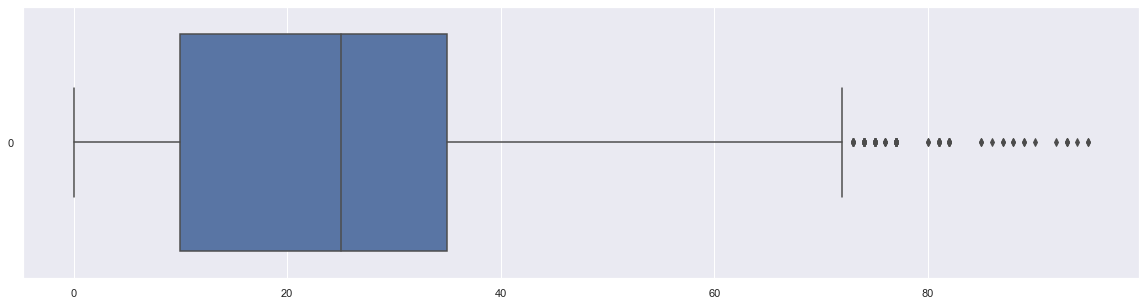

In [45]:
f, axes = plt.subplots(figsize=(20, 5))
sns.boxplot(data = video_game["User_Score"], orient = "h")

7. Visualisation for critic score

<AxesSubplot:>

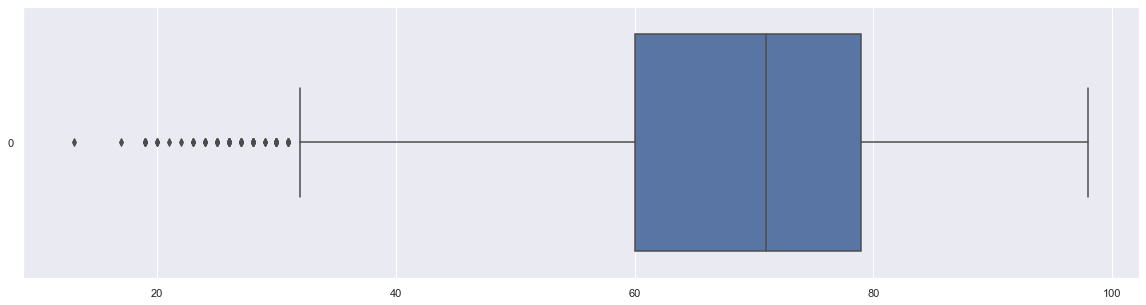

In [46]:
f, axes = plt.subplots(figsize=(20, 5))
sns.boxplot(data = video_game["Critic_Score"], orient = "h")

In [46]:
print("hello")